<a href="https://colab.research.google.com/github/chadantomar/ML/blob/main/dog_cat_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#/content/kaggle.json


In [ ]:
# Import OS for navigation and environment set up
import os
# Check current location, '/content' is the Colab virtual machine
os.getcwd()

'/content'

In [3]:
!mkdir -p /root/.kaggle/

In [4]:
!mv '/content/kaggle.json' /root/.kaggle/

In [ ]:
!kaggle datasets download -d dogs-vs-cats

not enough values to unpack (expected 3, got 2)


In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d dogs-vs-cats

not enough values to unpack (expected 3, got 2)


In [ ]:
!kaggle datasets download -d dogs-vs-cats

not enough values to unpack (expected 3, got 2)


In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 23.8MB/s]
100% 1.06G/1.06G [00:49<00:00, 22.9MB/s]


In [7]:
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [ ]:
import tensorflow as tf


In [8]:
train_ds= tf.keras.utils.image_dataset_from_directory(
    "/content/dogs_vs_cats/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)

)

Found 20000 files belonging to 2 classes.


In [9]:
validate_ds= tf.keras.utils.image_dataset_from_directory(
    "/content/dogs_vs_cats/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)

)

Found 5000 files belonging to 2 classes.


In [10]:
#Normalize
def preprocess(image,label):
  image= tf.cast(image/255., tf.float32)
  return image,label

In [11]:
train_ds= train_ds.map(preprocess)
validate_ds= validate_ds.map(preprocess)

In [ ]:
train_ds.as_numpy_iterator().next()

In [12]:
#create Model
model = tf.keras.Sequential()
model.add( tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2, padding="valid"))


model.add( tf.keras.layers.Conv2D(6, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2, padding="valid"))

model.add( tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2, padding="valid"))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 6)       1734      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 6)       24        
 chNormalization)                                                
                                                        

In [14]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [17]:
checkpoint_callback = ModelCheckpoint(filepath='/content/dog_cat_classifier.h5', save_best_only=True)
history = model.fit(train_ds, epochs=10, batch_size=32, validation_data=validate_ds, callbacks=[checkpoint_callback])

Epoch 1/10
625/625 [==============================] - ETA: 0s - loss: 0.9406 - accuracy: 0.6396

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 52s 83ms/step - loss: 0.9406 - accuracy: 0.6396 - val_loss: 0.9021 - val_accuracy: 0.6246
Epoch 2/10
625/625 [==============================] - 54s 86ms/step - loss: 0.5514 - accuracy: 0.7250 - val_loss: 0.6182 - val_accuracy: 0.6920
Epoch 3/10
625/625 [==============================] - 53s 85ms/step - loss: 0.4615 - accuracy: 0.7835 - val_loss: 0.5818 - val_accuracy: 0.7362
Epoch 4/10
625/625 [==============================] - 54s 86ms/step - loss: 0.3706 - accuracy: 0.8355 - val_loss: 0.7060 - val_accuracy: 0.7224
Epoch 5/10
625/625 [==============================] - 51s 81ms/step - loss: 0.2758 - accuracy: 0.8836 - val_loss: 0.7019 - val_accuracy: 0.7676
Epoch 6/10
625/625 [==============================] - 53s 85ms/step - loss: 0.1830 - accuracy: 0.9252 - val_loss: 1.0809 - val_accuracy: 0.7530
Epoch 7/10
625/625 [==============================] - 54s 85ms/step - loss: 0.1198 - accuracy: 0.9538 - val_loss: 0.9570 - val_accuracy: 0.7768
Epo

In [ ]:
#hist= model.fit(train_ds, epochs=10,validation_data=validate_ds)

In [18]:
history.history

{'loss': [0.9405707716941833,
  0.5513588786125183,
  0.4615054726600647,
  0.3705693781375885,
  0.27579522132873535,
  0.1829632669687271,
  0.11984872072935104,
  0.10630545765161514,
  0.08145758509635925,
  0.04912915453314781],
 'accuracy': [0.6395999789237976,
  0.7249500155448914,
  0.7834500074386597,
  0.8355000019073486,
  0.8835999965667725,
  0.9251999855041504,
  0.9537500143051147,
  0.9631999731063843,
  0.970550000667572,
  0.9832500219345093],
 'val_loss': [0.902147650718689,
  0.6181774735450745,
  0.5818206667900085,
  0.7060214281082153,
  0.7019001841545105,
  1.080862045288086,
  0.956957995891571,
  1.3982748985290527,
  1.358117699623108,
  1.1017348766326904],
 'val_accuracy': [0.6245999932289124,
  0.6919999718666077,
  0.7361999750137329,
  0.7224000096321106,
  0.7675999999046326,
  0.753000020980835,
  0.7767999768257141,
  0.6922000050544739,
  0.7408000230789185,
  0.7609999775886536]}

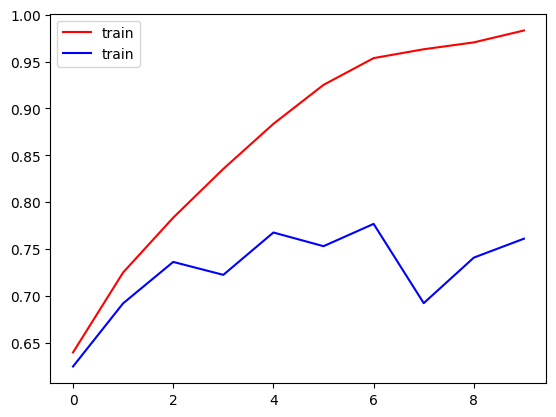

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], color='r', label='train')
plt.plot(history.history["val_accuracy"], color='b', label='train')
plt.legend()
plt.show()

In [20]:
import cv2

In [21]:
img = cv2.imread('/content/dogs_vs_cats/test/cats/cat.10001.jpg')

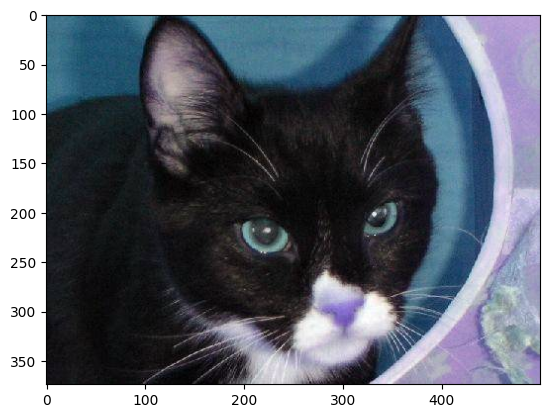

In [22]:
plt.imshow(img)

In [23]:
img.shape

(374, 500, 3)

In [24]:
test_img = cv2.resize(img,(256,256))

In [25]:
test_img = test_img.reshape((1,256,256,3))

In [26]:
model.predict(test_img)

1/1 [==============================] - 0s 322ms/step


array([[0.]], dtype=float32)

In [27]:
#log existing Model
import tensorflow as tf

In [28]:
model= tf.keras.models.load_model("/content/dog_cat_classifier.h5")

In [30]:
prediction_prob =model.predict(test_img)

1/1 [==============================] - 0s 18ms/step


In [31]:
prediction_binary = 1 if prediction_prob > .5 else 0

print(prediction_binary)

0
